In [42]:
%pip install pandas matplotlib textblob 

  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from textblob import TextBlob

# silence warnings
import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
data = pd.read_csv("C:/Users/hp/Documents/10 academy/Week 1/data/raw_analyst_ratings.csv")

# Data Understanding

In [3]:
data.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
data.shape

(1407328, 6)

In [5]:
data.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [6]:
data.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [8]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [9]:
data.shape
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


# Descriptive Statistics

In [10]:
# Get the length of each headline
data['headline_length'] = data['headline'].str.len()

# Descriptive statistics of headline length
data['headline_length'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

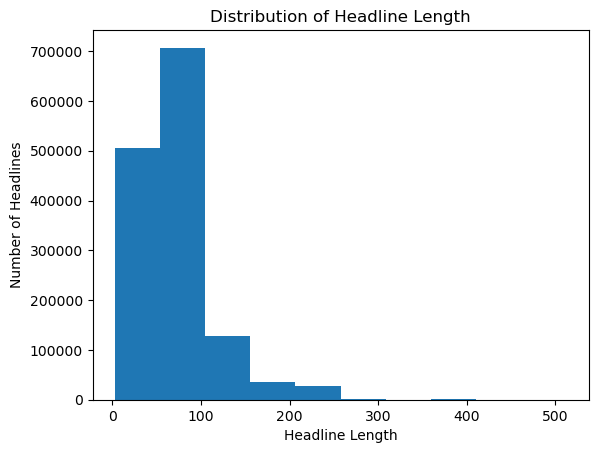

In [11]:
# Distribution of headline length
plt.hist(data['headline_length'])
plt.xlabel('Headline Length')
plt.ylabel('Number of Headlines')
plt.title('Distribution of Headline Length')
plt.show()

# Publisher Analysis

In [12]:
# Publisher count sorted in descending order
publisher_counts = data['publisher'].value_counts().sort_values(ascending = False)

publisher_counts.head(10)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

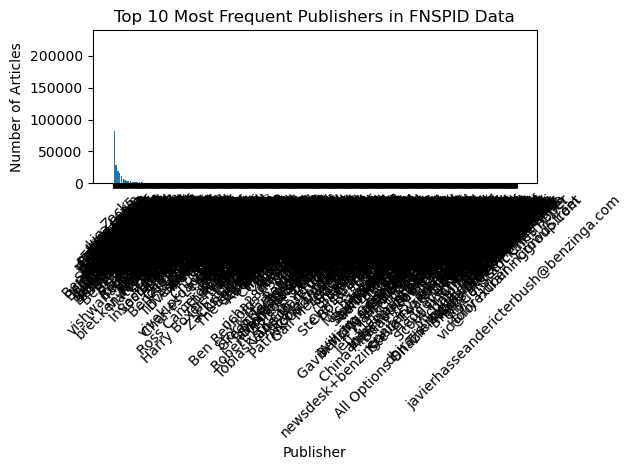

In [13]:
# plot publisher counts as a bar chart
plt.bar(publisher_counts.index, publisher_counts.values)
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.title('Top 10 Most Frequent Publishers in FNSPID Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

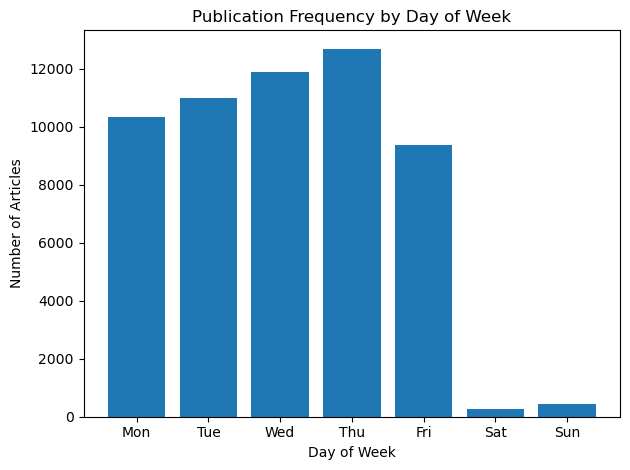

In [21]:
# Convert the data column to datetime format
data['datetime'] = pd.to_datetime(data['date'], errors='coerce')

# Analyze publication frequency by day of week
day_of_week_counts = data['datetime'].dt.dayofweek.value_counts()

# Plot publication frequency by day of week
plt.bar(day_of_week_counts.index, day_of_week_counts.values)
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.title('Publication Frequency by Day of Week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Customize x-axis labels
plt.tight_layout()
plt.show()

# Text Analysis

In [28]:
# Sentiment Analysis on the first 10 headlines
sentiment_analysis = []
for headline in data['headline'].head(100):  # Use head(10) to get the first 50000
  sentiment = TextBlob(headline).sentiment
  sentiment_analysis.append({
      "original_headline": headline,  # Can be replaced with original headline if needed
      "sentiment": sentiment,
      "sentiment_category": "Positive" if sentiment.polarity > 0.5 else ("Negative" if sentiment.polarity < -0.5 else "Neutral")
  })

# Print results
for analysis in sentiment_analysis:
  print(f"Original Headline: {analysis['original_headline']}")  # Can be replaced with original headline if needed
  print(f"Sentiment: {analysis['sentiment']}")
  print(f"Sentiment Category: {analysis['sentiment_category']}")
  print("------")

Original Headline: Stocks That Hit 52-Week Highs On Friday
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment Category: Neutral
------
Original Headline: Stocks That Hit 52-Week Highs On Wednesday
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment Category: Neutral
------
Original Headline: 71 Biggest Movers From Friday
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment Category: Neutral
------
Original Headline: 46 Stocks Moving In Friday's Mid-Day Session
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment Category: Neutral
------
Original Headline: B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment Category: Neutral
------
Original Headline: CFRA Maintains Hold on Agilent Technologies, Lowers Price Target to $85
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment Category: Neutral
------
Original Headline: UBS Maintains Neutral

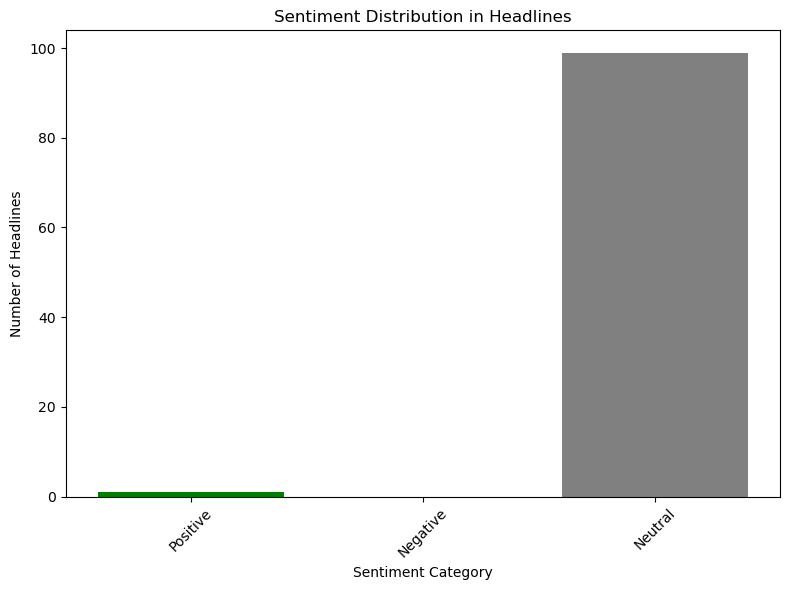

In [29]:
# Count sentiment occurrences
sentiment_counts = {"Positive": 0, "Negative": 0, "Neutral": 0}
for analysis in sentiment_analysis:
  sentiment_counts[analysis["sentiment_category"]] += 1

# Extract sentiment categories and counts
sentiment_categories = list(sentiment_counts.keys())
sentiment_values = list(sentiment_counts.values())

# Create bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(sentiment_categories, sentiment_values, color=['green', 'red', 'gray'])
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Headlines")
plt.title("Sentiment Distribution in Headlines")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Time Sereies Analysis

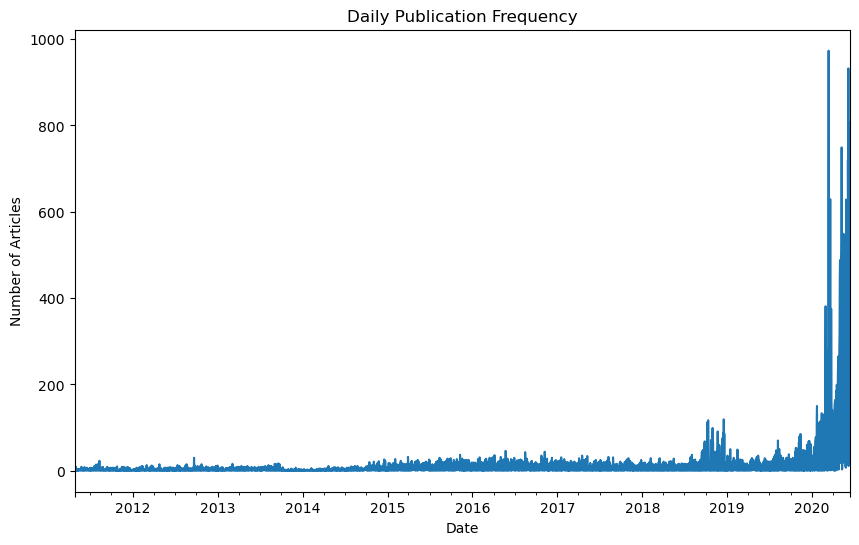

In [32]:
# Assuming 'date' column contains publication dates
data['datetime'] = pd.to_datetime(data['date'], errors='coerce')  # Adjust format if needed

# Set 'datetime' as the index
data.set_index('datetime', inplace=True)

# Now you can use resample
daily_counts = data.resample('D')['headline'].count()

# Plot daily publication frequency
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Daily Publication Frequency')
plt.show()

In [34]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
datetime,,,,,,,
2020-06-05 10:30:54-04:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
2020-06-03 10:45:20-04:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2020-05-26 04:30:07-04:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
2020-05-22 12:45:06-04:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
2020-05-22 11:38:59-04:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87
